In [1]:
# RBM tutorial - http://www.cs.toronto.edu/~hinton/absps/guideTR.pdf
# Hopfield Networks - http://web.cs.ucla.edu/~rosen/161/notes/hopfield.html
# Python RBM - http://deeplearning.net/tutorial/rbm.html#contrastive-divergence-cd-k
# RBM Formulas - http://www.iro.umontreal.ca/~lisa/twiki/bin/view.cgi/Public/DBNEquations
# Gaussian bernoulli - http://research.ics.aalto.fi/bayes/papers/files/icann11.pdf

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
from src.RBM import RBM, get_x, sample

In [160]:
2**5

32

In [5]:
big_alphabet = np.load("../hw1/data/big-alphabet_29x29_train-test-cv.npz")
big_alphabet.keys()

['test', 'train', 'cv']

In [6]:
train_x = get_x(big_alphabet["train"])
cv_x = get_x(big_alphabet["cv"])
test_x = get_x(big_alphabet["test"])

![](http://take.ms/mj0rY)
![](http://take.ms/7aOPf)
![](http://take.ms/P0xeg)
![](http://take.ms/kBTrm)

In [136]:
def plot_results(rbm, test_x, img_size = 28):
    plt.figure(figsize=(16, 5))

    gs = gridspec.GridSpec(3, 5, wspace=0.0, hspace=0.0)
    ax = plt.subplot(gs[:2, :2])
    ax.plot(range(len(rbm.scores)), rbm.scores);

    for i in range(3):
        test_sample = test_x[np.random.randint(0, 50)]
        
        ax = plt.subplot(gs[0, 2 + i]);ax.set_xticks([]);ax.set_yticks([]);
        vis = (rbm.visible_step(rbm.hidden_step(test_sample)))
        ax.imshow(sample(vis).reshape((img_size,img_size)), cmap="gray")
        
        ax = plt.subplot(gs[1, 2 + i]);ax.set_xticks([]);ax.set_yticks([]);
        vis = (rbm.visible_step(rbm.hidden_step(test_sample)))
        ax.imshow((vis).reshape((img_size,img_size)), cmap="gray")
        
        ax = plt.subplot(gs[2, 2 + i]);ax.set_xticks([]);ax.set_yticks([]);
        ax.imshow((test_sample).reshape((img_size,img_size)), cmap="gray")

# RBM test

# Experiment 1

In [81]:
params1 = {
    "size": (841, 100),
    "eta": 0.008,
    "batch_size": 40,
    "epochs": 1500,
    "momentum": 0.9
}

rbm1 = RBM(**params1)
rbm1.fit(train_x, cv_x)

1499 / 1500 | 11.4417396864

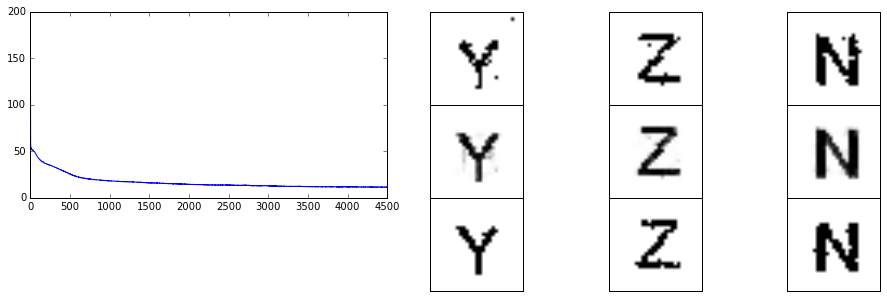

In [94]:
plot_results(rbm1, test_x, 29)

# Experiment 2

In [112]:
params2 = {
    "size": (841, 1024),
    "eta": 0.008,
    "batch_size": 40,
    "epochs": 1500,
    "momentum": 0.9
}

rbm2 = RBM(**params2)
rbm2.fit(train_x, cv_x)

123 / 1500 | 9.54585762294 0.0103849150155! 0.000993774298485


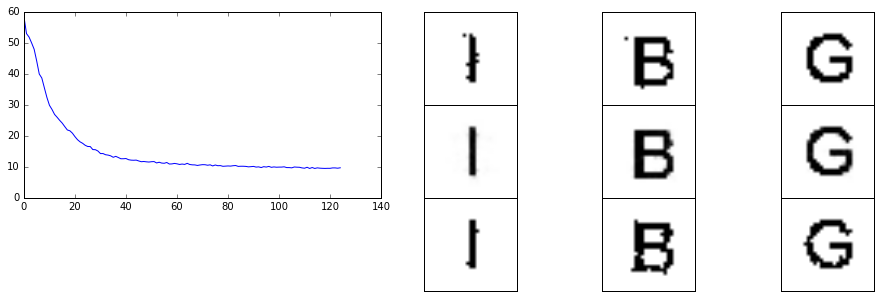

In [113]:
plot_results(rbm2, test_x, 29)

# Experiment 3

In [148]:
params2 = {
    "size": (841, 400),
    "eta": 0.001,
    "batch_size": 10,
    "epochs": 1500,
    "momentum": 0.9
}

rbm2 = RBM(**params2)
rbm2.fit(train_x, cv_x)

124 / 1500 | 11.5983872741 0.00218047997674

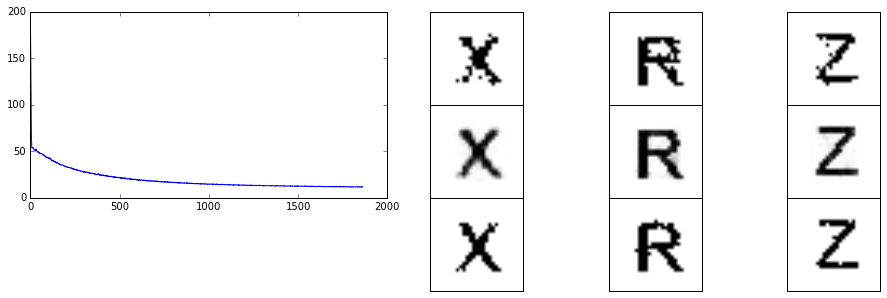

In [149]:
plot_results(rbm2, test_x, 29)